# Projet 1

In [1]:
import re

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
book =  open("LOTR_ReturnOfTheKing.txt").read()

book_chapters = re.split(r"_Chapter \w+_",book)[1:]



In [3]:
Characters = [["aragorn","strider","the heir of isildur","king of Gondor"], 
              ["arwen", "queen of gondor","evenstar"],
              ["bill ferny"], ["bilbo"],["boromir"], 
              ["beregond"],["bergil"],["butterbur","barliman"],
              ["celeborn", "lord of lothlorien"],["deagol"],
              ["denethor","steward of gondor"],
              ["elanor"],["elendil"],
              ["elladan"],
              ["elrond"],
              ["eomer"],["erestor"],
              ["eowyn","lady of rohan"],
              ["elrohir"],
              ["finduilas"],
              ['fredegar bolger',"fatty","fredegar"], 
              ["frodo","mr. underhill"],
              ["gollum", "smeagol"],
              ["gwaihir"],
              ["faramir"],
              ["galadriel"],
              ["gandalf","mithrandir", "white rider","grey Fool"],
              ["gimli"],
              ["glorfindel"],
              ["gothmog", "the lieutenant of morgul"],
              ["grima","wormtongue"],
              ["imrahil","prince imrahil"],
              ["isildur"],
              ["king of the deads", "king of the mountains"],
              ["legolas"],
              ["lord of nazgul","ringwraiths","black rider", "the witch king", "king of angmar"],
              ["lotho"],
              ["merry","meriadoc","brandybuck"],
              ["pippin","peregrin","tooks"],
              ["robin", "smallburrow"],
              ["rose cotton", "rosie"],
              ["sam","samwise","gamgee"],
              ["saruman"],
              ["sauron","lord of mordor","lord of the dark tower"],
              ["shadowfax"],
              ["shagrat"],
              ["shelob"],
              ["snaga"],
              ["the lieutenant of the dark tower", "the lieutenant of the tower","the mouth of sauron"],
              ["tom cotton","farmer cotton" ],
              ["theoden","king of the mark","lord of the mark"],
              ["treebeard","fangorn"],
              ["widfara"]]


FirstName = [el[0] for el in Characters]
print(FirstName)
len(FirstName)

['aragorn', 'arwen', 'bill ferny', 'bilbo', 'boromir', 'beregond', 'bergil', 'butterbur', 'celeborn', 'deagol', 'denethor', 'elanor', 'elendil', 'elladan', 'elrond', 'eomer', 'erestor', 'eowyn', 'elrohir', 'finduilas', 'fredegar bolger', 'frodo', 'gollum', 'gwaihir', 'faramir', 'galadriel', 'gandalf', 'gimli', 'glorfindel', 'gothmog', 'grima', 'imrahil', 'isildur', 'king of the deads', 'legolas', 'lord of nazgul', 'lotho', 'merry', 'pippin', 'robin', 'rose cotton', 'sam', 'saruman', 'sauron', 'shadowfax', 'shagrat', 'shelob', 'snaga', 'the lieutenant of the dark tower', 'tom cotton', 'theoden', 'treebeard', 'widfara']


53

In [4]:
print("number of characters: "+ str(len(Characters)))

number of characters: 53


In [5]:
## CLEANING 
cleaned_parag =[]
for ChapterNb, Chapter in enumerate(book_chapters):
    paragraphsEnsemble = Chapter.split('\n\n')
    for parag in paragraphsEnsemble :
        parag_new = re.sub(r"[!?',;.:']", ' ', parag)
        cleaned_parag.append(parag_new.lower())
        


Data transformation

In [6]:
CoocMatrix ={}
OccurenceList={} # number of times a characters is present

for parag in cleaned_parag: # Per paragraph, check if words are a Character

    List = []
    for w in parag.split(): # parcourir chaque mot
        for perso in Characters: # parcourir chaque personnage
            if w in perso: # si w fait parti de l'un des noms du personnagen alors on le met égal à son FirstName, ici = perso[0]
                w = perso[0]
                if w not in List:
                    List.append(w)
    
    n = len(List)
    for i in range(n):
        for j in range(i,n):
            if(i==j):
                OccurenceList[List[i]] = OccurenceList.get((List[i]) ,0)+1
            else:
                CoocMatrix[(List[i],List[j])] = CoocMatrix.get((List[i],List[j]) ,0)+1
                CoocMatrix[(List[j],List[i])] = CoocMatrix.get((List[j],List[i]) ,0)+1
        

print(CoocMatrix)
print()
print(OccurenceList)

{('pippin', 'gandalf'): 46, ('gandalf', 'pippin'): 46, ('pippin', 'shadowfax'): 16, ('shadowfax', 'pippin'): 16, ('pippin', 'frodo'): 22, ('frodo', 'pippin'): 22, ('gandalf', 'shadowfax'): 17, ('shadowfax', 'gandalf'): 17, ('gandalf', 'frodo'): 23, ('frodo', 'gandalf'): 23, ('shadowfax', 'frodo'): 6, ('frodo', 'shadowfax'): 6, ('pippin', 'denethor'): 20, ('denethor', 'pippin'): 20, ('pippin', 'boromir'): 10, ('boromir', 'pippin'): 10, ('shadowfax', 'denethor'): 8, ('denethor', 'shadowfax'): 8, ('shadowfax', 'boromir'): 4, ('boromir', 'shadowfax'): 4, ('gandalf', 'denethor'): 22, ('denethor', 'gandalf'): 22, ('gandalf', 'boromir'): 11, ('boromir', 'gandalf'): 11, ('denethor', 'boromir'): 10, ('boromir', 'denethor'): 10, ('gandalf', 'imrahil'): 19, ('imrahil', 'gandalf'): 19, ('imrahil', 'pippin'): 10, ('pippin', 'imrahil'): 10, ('pippin', 'elendil'): 2, ('elendil', 'pippin'): 2, ('frodo', 'elendil'): 2, ('elendil', 'frodo'): 2, ('gandalf', 'elendil'): 4, ('elendil', 'gandalf'): 4, ('sha

In [7]:
print(len(list(OccurenceList.values())))

44


In [8]:
# DataFrame Coocurence
df = pd.DataFrame(columns = FirstName, index = FirstName)
df[:] = int(0)

for (key1,key2) in CoocMatrix:
    df[key1][key2] = CoocMatrix[(key1,key2)]
#print(df)
print(len(df))

53


In [9]:
# M : Weight regulirizator
#M = df.to_numpy().max()
MostFrequentCharac = max(OccurenceList, key=OccurenceList.get)
print(MostFrequentCharac)
M = OccurenceList[MostFrequentCharac]
M

gandalf


71

In [10]:
print(list(OccurenceList.values()))
len(list(OccurenceList.values()))



[58, 71, 17, 53, 27, 11, 24, 7, 53, 31, 52, 11, 4, 18, 8, 20, 20, 4, 5, 23, 13, 17, 8, 39, 4, 6, 1, 5, 3, 16, 6, 7, 2, 5, 2, 1, 1, 1, 4, 2, 6, 1, 1, 2]


44

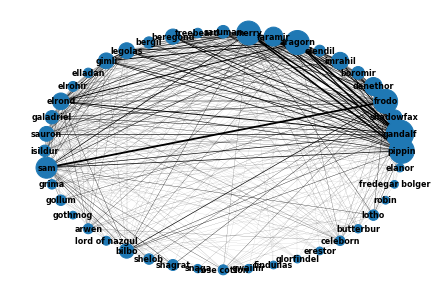

In [11]:
G = nx.Graph()
#nx.add_path(G,Characters)
NodesSize = list(OccurenceList.values()) # les occurences de chaque perso

G.add_nodes_from(OccurenceList.keys())


for (key1,key2) in CoocMatrix:
    G.add_edge(key1, key2, weight=CoocMatrix[key1,key2]/20)
weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, 
        pos = nx.circular_layout(G), 
        node_size = [50 + x*10 for x in NodesSize],
        width=weights,
        font_size = 8,
        font_weight = 'bold',
        with_labels = True) 
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


#plt.show()

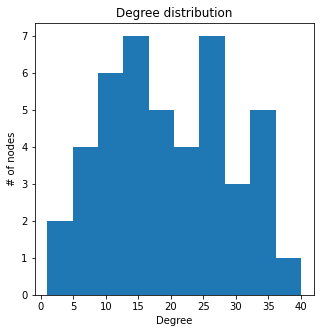

In [15]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title("Degree distribution")
    plt.xlabel("Degree")
    plt.ylabel("# of nodes")
    plt.show()

plot_degree_dist(G)